# BaseLine

In [117]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
from datetime import datetime
import time

# 행 많이보기
pd.set_option('display.max_row', 40)
pd.set_option('display.max_columns', 30)

# 한글 폰트 설정
# fm.get_fontconfig_fonts()
# font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
# font_name = fm.FontProperties(fname=font_location).get_name()
# plt.rc('font', family=font_name)
# plt.rc('font', size=12)
# plt.figure(figsize=(20,10))

# 지수 표현 안보기

# 데이터 로드
data = pd.read_excel('../../Data/2019_data_time.xlsx', encoding='cp949', header=0, parse_dates=["방송일시"])
data_air = pd.read_csv('../../Data/서울시_기간별_시간평균_대기환경_정보_2019.csv', encoding='cp949', header=0, parse_dates=["time"])
# 무형 제거

data.drop(data[data['상품군']=='무형'].index, inplace=True)
data.reset_index(inplace=True)



# 판매단가, 취급액 쉼표 제거 , int 변환

# data['판매단가'] = data['판매단가'].str.replace(',','').astype(int)
# data['취급액'] = data['취급액'].str.replace(',','').astype(int)
# data['노출(분)'] = data['노출(분)'].astype(int)



# 취급액 결측치 값 변경
# df.loc[df['취급액']==1]['취급액'] = 50000



# 날짜 변경 ( 다음날 데이터를 현재 날짜로 할 건지 )




# data 의 colname 영어로 변경
# index drop 필요
print(data.columns)
data.columns = ['index', 'time', 'exposure_time', 'mcode', 'product_code', 'product_name', 'category','price','salesAMT']
print(data.columns)
                
# M', 'D', 'day', 'H', 'm',
#3

Index(['index', '방송일시', '노출(분)', '마더코드', '상품코드', '상품명', '상품군', '판매단가', '취급액'], dtype='object')
Index(['index', 'time', 'exposure_time', 'mcode', 'product_code',
       'product_name', 'category', 'price', 'salesAMT'],
      dtype='object')


In [135]:
data_air1 = pd.read_csv('../../Data/air/서울시_기간별_시간평균_대기환경_정보_2019.01.csv', encoding='cp949', header=0, parse_dates=["측정일시"])
data_air2 = pd.read_csv('../../Data/air/서울시_기간별_시간평균_대기환경_정보_2019.02.csv', encoding='cp949', header=0, parse_dates=["측정일시"])
data_air3 = pd.read_csv('../../Data/air/서울시_기간별_시간평균_대기환경_정보_2019.03.csv', encoding='cp949', header=0, parse_dates=["측정일시"])
data_air4 = pd.read_csv('../../Data/air/서울시_기간별_시간평균_대기환경_정보_2019.04.csv', encoding='cp949', header=0, parse_dates=["측정일시"])
data_air5 = pd.read_csv('../../Data/air/서울시_기간별_시간평균_대기환경_정보_2019.05.csv', encoding='cp949', header=0, parse_dates=["측정일시"])
data_air6 = pd.read_csv('../../Data/air/서울시_기간별_시간평균_대기환경_정보_2019.06.csv', encoding='cp949', header=0, parse_dates=["측정일시"])
data_air7 = pd.read_csv('../../Data/air/서울시_기간별_시간평균_대기환경_정보_2019.07.csv', encoding='cp949', header=0, parse_dates=["측정일시"])
data_air8 = pd.read_csv('../../Data/air/서울시_기간별_시간평균_대기환경_정보_2019.08.csv', encoding='cp949', header=0, parse_dates=["측정일시"])
data_air9 = pd.read_csv('../../Data/air/서울시_기간별_시간평균_대기환경_정보_2019.09.csv', encoding='cp949', header=0, parse_dates=["측정일시"])
data_air10 = pd.read_csv('../../Data/air/서울시_기간별_시간평균_대기환경_정보_2019.10.csv', encoding='cp949', header=0, parse_dates=["측정일시"])
data_air11 = pd.read_csv('../../Data/air/서울시_기간별_시간평균_대기환경_정보_2019.11.csv', encoding='cp949', header=0, parse_dates=["측정일시"])
data_air12 = pd.read_csv('../../Data/air/서울시_기간별_시간평균_대기환경_정보_2019.12.csv', encoding='cp949', header=0, parse_dates=["측정일시"])


In [141]:
data_air = pd.concat([data_air1, data_air2, data_air3, data_air4, data_air5, data_air6,
data_air7, data_air8, data_air9, data_air10, data_air11, data_air12])
data_air.drop(["권역코드", "권역명", "측정소코드", "측정소명"], axis=1, inplace=True)
data_air.columns = ["time, FP", "FP24", "UFP", "ozon", "NO2", "CO", "SO2"]
data_air

ValueError: Length mismatch: Expected axis has 8 elements, new values have 7 elements

# Preprocessing

##  Branch : 12날짜 변경 

In [118]:
# 방송일시를 월,일,시간,요일로 변경하여 저장
data["time"] = pd.to_datetime(data["time"], format='%Y-%m-%d %h:%m', errors='raise')
data["time_month"] = data["time"].dt.month
data["time_day"] = data["time"].dt.day
data["time_hour"] = data["time"].dt.hour
data["time_min"] = data["time"].dt.minute
data["day_of_the_week"] = data["time"].dt.dayofweek
data.head()

index                time  exposure_time   mcode  product_code  \
0      0 2019-01-01 06:00:00           20.0  100346        201072   
1      1 2019-01-01 06:00:00           20.0  100346        201079   
2      2 2019-01-01 06:20:00           20.0  100346        201072   
3      3 2019-01-01 06:20:00           20.0  100346        201079   
4      4 2019-01-01 06:40:00           20.0  100346        201072   

    product_name category  price   salesAMT  time_month  time_day  time_hour  \
0  테이트 남성 셀린니트3종       의류  39900  2099000.0           1         1          6   
1  테이트 여성 셀린니트3종       의류  39900  4371000.0           1         1          6   
2  테이트 남성 셀린니트3종       의류  39900  3262000.0           1         1          6   
3  테이트 여성 셀린니트3종       의류  39900  6955000.0           1         1          6   
4  테이트 남성 셀린니트3종       의류  39900  6672000.0           1         1          6   

   time_min  day_of_the_week  
0         0                1  
1         0                1  
2        20                1  
3        20                1  
4        40                1

In [119]:
# 홈쇼핑 하루 방송 사이클이 오전 06시(06시20분)~익일 02시(02시20분) 까지 이므로 날짜를 맞춰주는 작업 수행
# 0시~3시 사이의 방송시간을 24시~27시로 변경
# 방송 날짜와 요일을 하루전으로 변경
overnight_index_list = data.loc[(data["time_hour"] >=0) & (data["time_hour"] < 3)].index
overnight_index_list
data.loc[overnight_index_list, "time_hour"] += 24
data.loc[overnight_index_list, "time_day"] -= 1
data.loc[overnight_index_list, "day_of_the_week"] -= 1
data.loc[data["day_of_the_week"] == -1, "day_of_the_week"] = 6

In [120]:
# 다음달로 넘어가거나 다음연도로 넘어간 항목은 월,일 재조정
data.loc[(data["time_month"] == 2) & (data["time_day"] == 0), ["time_month", "time_day"]] = 1, 31
data.loc[(data["time_month"] == 3) & (data["time_day"] == 0), ["time_month", "time_day"]] = 2, 28
data.loc[(data["time_month"] == 4) & (data["time_day"] == 0), ["time_month", "time_day"]] = 3, 31
data.loc[(data["time_month"] == 5) & (data["time_day"] == 0), ["time_month", "time_day"]] = 4, 30
data.loc[(data["time_month"] == 6) & (data["time_day"] == 0), ["time_month", "time_day"]] = 5, 31
data.loc[(data["time_month"] == 7) & (data["time_day"] == 0), ["time_month", "time_day"]] = 6, 30
data.loc[(data["time_month"] == 8) & (data["time_day"] == 0), ["time_month", "time_day"]] = 7, 31
data.loc[(data["time_month"] == 9) & (data["time_day"] == 0), ["time_month", "time_day"]] = 8, 31
data.loc[(data["time_month"] == 10) & (data["time_day"] == 0), ["time_month", "time_day"]] = 9, 30
data.loc[(data["time_month"] == 11) & (data["time_day"] == 0), ["time_month", "time_day"]] = 10, 31
data.loc[(data["time_month"] == 12) & (data["time_day"] == 0), ["time_month", "time_day"]] = 11, 30
data.loc[(data["time_month"] == 1) & (data["time_day"] == 0), ["time_month", "time_day"]] = 12, 31

In [121]:
data.tail()

index                time  exposure_time   mcode  product_code  \
37367  38299 2019-12-31 23:40:00           20.0  100448        201391   
37368  38300 2020-01-01 00:00:00           20.0  100448        201383   
37369  38301 2020-01-01 00:00:00           20.0  100448        201390   
37370  38302 2020-01-01 00:00:00           20.0  100448        201384   
37371  38303 2020-01-01 00:00:00           20.0  100448        201391   

         product_name category   price     salesAMT  time_month  time_day  \
37367   일시불쿠첸압력밥솥 6인용       주방  148000   10157000.0          12        31   
37368  무이자쿠첸압력밥솥 10인용       주방  178000   50929000.0          12        31   
37369  일시불쿠첸압력밥솥 10인용       주방  168000  104392000.0          12        31   
37370   무이자쿠첸압력밥솥 6인용       주방  158000   13765000.0          12        31   
37371   일시불쿠첸압력밥솥 6인용       주방  148000   46608000.0          12        31   

       time_hour  time_min  day_of_the_week  
37367         23        40                1  
37368         24         0                1  
37369         24         0                1  
37370         24         0                1  
37371         24         0                1

In [122]:
# 카테고리명 영어로 변경
data.loc[data["category"] == "의류", "category"] = "clothes"
data.loc[data["category"] == "속옷", "category"] = "underwear"
data.loc[data["category"] == "주방", "category"] = "kitchen"
data.loc[data["category"] == "농수축", "category"] = "food"
data.loc[data["category"] == "이미용", "category"] = "beauty"
data.loc[data["category"] == "가전", "category"] = "electronics"
data.loc[data["category"] == "생활용품", "category"] = "necessaries"
data.loc[data["category"] == "건강기능", "category"] = "health"
data.loc[data["category"] == "잡화", "category"] = "goods"
data.loc[data["category"] == "가구", "category"] = "furniture"
data.loc[data["category"] == "침구", "category"] = "bedding"

In [123]:
# 분기 파생변수 생성
data.loc[(data["time_month"] >= 1) & (data["time_month"] < 4), "quater"] = 1
data.loc[(data["time_month"] >= 4) & (data["time_month"] < 7), "quater"] = 2
data.loc[(data["time_month"] >= 7) & (data["time_month"] < 10), "quater"] = 3
data.loc[data["time_month"] >= 10, "quater"] = 4

In [124]:
# 계절 파생변수 생성
# 0 = 봄(3~5월), 1 = 여름(6~8월), 2= 가을(9~11월), 3 = 겨울(12~2월)
data.loc[(data["time_month"] >= 3) & (data["time_month"] < 6), "season"] = 0
data.loc[(data["time_month"] >= 6) & (data["time_month"] < 9), "season"] = 1
data.loc[(data["time_month"] >= 9) & (data["time_month"] < 12), "season"] = 2
data.loc[(data["time_month"] >= 12) | (data["time_month"] < 3), "season"] = 3

In [125]:
# 판매량 계산
data["sales"] = data["salesAMT"] / data["price"]

## 미세먼지 데이터 처리

In [126]:
data_air = data_air.sort_values(by=["time","FP"])
data_air["time"] = pd.to_datetime(data_air["time"], format='%Y-%m-%d', errors='raise')
data_air["time_month"] = data_air["time"].dt.month
data_air["time_day"] = data_air["time"].dt.day
data_air

ValueError: time data 2.02E+11 doesn't match format specified

In [113]:
data_air

time  FP  UFP   ozon    NO2   CO    SO2  time_month  time_day
8873 2019-01-01  31   25  0.013  0.033  0.6  0.003           1         1
8874 2019-01-01  34   23  0.019  0.024  0.9  0.005           1         1
8886 2019-01-01  34   18  0.016  0.028  0.4  0.006           1         1
8890 2019-01-01  34   25  0.014  0.034  0.6  0.004           1         1
8872 2019-01-01  35   22  0.016  0.033  0.7  0.004           1         1
...         ...  ..  ...    ...    ...  ...    ...         ...       ...
22   2019-12-31  28   13  0.028  0.019  0.2  0.003          12        31
24   2019-12-31  28   19  0.020  0.018  0.4  0.003          12        31
14   2019-12-31  29   16  0.024  0.015  0.4  0.004          12        31
20   2019-12-31  29   17  0.019  0.017  0.4  0.004          12        31
12   2019-12-31  32   17  0.023  0.021  0.3  0.002          12        31

[8896 rows x 9 columns]

In [116]:
data_air_03

측정일시  권역코드  권역명   측정소코드  측정소명  미세먼지 1시간(㎍/㎥)  \
0     2019-03-31 23:00:00   100  도심권  111123   종로구             21   
1     2019-03-31 23:00:00   100  도심권  111131   용산구             16   
2     2019-03-31 23:00:00   100  도심권  111121    중구             23   
3     2019-03-31 23:00:00   101  서북권  111181   은평구             28   
4     2019-03-31 23:00:00   101  서북권  111191  서대문구             25   
...                   ...   ...  ...     ...   ...            ...   
18595 2019-03-01 00:00:00   103  서남권  111231  영등포구            105   
18596 2019-03-01 00:00:00   104  동남권  111261   강남구             95   
18597 2019-03-01 00:00:00   104  동남권  111262   서초구             90   
18598 2019-03-01 00:00:00   104  동남권  111274   강동구             92   
18599 2019-03-01 00:00:00   104  동남권  111273   송파구             87   

       미세먼지 24시간(㎍/㎥)  초미세먼지(㎍/㎥)  오존(ppm)  이산화질소농도(ppm)  일산화탄소농도(ppm)  \
0                  29          14    0.033         0.021           0.4   
1                  26          12    0.028         0.024           0.4   
2                  30          14    0.039         0.021           0.4   
3                  34          15    0.036         0.019           0.7   
4                  33          18    0.027         0.024           1.0   
...               ...         ...      ...           ...           ...   
18595              96          84    0.013         0.069           0.6   
18596              92          72    0.015         0.053           0.7   
18597              92          76    0.013         0.063           0.6   
18598              99          68    0.004         0.085           0.9   
18599              93          58    0.002         0.081           1.0   

       아황산가스농도(ppm)  
0             0.002  
1             0.002  
2             0.003  
3             0.004  
4             0.004  
...             ...  
18595         0.003  
18596         0.007  
18597         0.005  
18598         0.006  
18599         0.005  

[18600 rows x 12 columns]

In [114]:
data_air_pivot = data_air.pivot_table(index=["time_month"], columns="time_day", values=["FP"], aggfunc=np.median)
data_air_pivot

FP                                                            \
time_day       1      2     3      4      5      6     7     8     9     10   
time_month                                                                    
1            38.0   32.0  38.0   59.0   64.0   51.0  55.0  41.0  50.0  57.0   
2            38.0   57.0  38.0   73.0   85.0   95.0  62.0  32.0  35.0  42.0   
3           117.0  116.0  99.0  157.0  188.0  143.0  56.0  52.0   NaN   NaN   
4            24.0   32.0  39.0   35.0   77.0   61.0  36.0  36.0  26.0   7.0   
5            64.0   56.0  58.0   93.0   63.0   34.0  48.0  51.0  50.0  61.0   
6            34.0   36.0  39.0   30.0   51.0   66.0  12.0  25.0  38.0  10.0   
7            34.0   30.0  33.0   32.0   33.0   29.0  17.0  10.0  10.0  10.0   
8            13.0   19.0  20.0   27.0   37.0   27.0  20.0  40.0  27.0  21.0   
9            19.0   25.0  23.0    7.0    9.0   13.0   NaN   NaN  35.0  13.0   
10           45.0   23.0   7.0   24.0   40.0   10.0  11.0  22.0  22.5  28.5   
11          100.0   74.0  58.0   14.0   33.0   50.0  49.0  45.0  44.0  44.0   
12           38.0   23.0  28.0   28.0   22.0   32.0  45.5  53.5  61.0  98.0   

                                             ...                          \
time_day      11    12     13     14     15  ...    17    18    19    20   
time_month                                   ...                           
1           74.0  98.0  109.0  161.0  139.0  ...  43.0  54.0  94.0  71.0   
2           38.0  57.0   40.0   49.0   39.0  ...  36.0  41.0  43.0  59.0   
3            NaN   NaN    NaN   41.0   70.0  ...   NaN  39.0  62.0  98.0   
4           27.0  47.0   49.0   39.0   51.0  ...  40.0  37.0  42.0  45.0   
5           69.0  58.0   56.0   43.0   67.0  ...  55.0  30.0  14.0  39.0   
6           12.0  31.0   32.0   34.0   37.0  ...  24.0  32.0  34.0  28.0   
7            7.0  13.0   32.0   41.0   38.0  ...  59.0  64.0  33.0   8.0   
8           17.0  17.0   23.0   17.0    8.0  ...  31.0  21.0  24.0  28.0   
9            7.0  12.0   13.0   18.0   15.0  ...  18.0  32.0  27.0  23.0   
10          34.0  23.0   18.0   32.0   18.0  ...  27.0  15.0  20.0  35.0   
11          25.0  39.0   36.0   20.0   23.0  ...  28.0  78.0  30.0  22.0   
12          80.0  21.0   27.0   38.0   35.0  ...  28.0  38.0  25.0  29.0   

                                                                               
time_day      21    22    23    24    25    26    27    28     29    30    31  
time_month                                                                     
1           43.0  66.0  77.0  43.0  48.0  43.0  37.0  86.0   68.0  63.0  74.0  
2           76.0  74.0  54.0  58.0  86.0  52.0  67.0  90.0    NaN   NaN   NaN  
3           32.0  39.0  25.0  28.0  46.0  56.0  94.0  84.0   39.0  35.0  44.0  
4           31.0  89.0  93.0  58.0  41.0   8.0  18.0  19.0   22.0  35.0   NaN  
5           51.0  58.0  74.0  85.0  86.0  40.0  23.0  22.0   48.0  45.0  21.0  
6           27.0  11.0  11.0  20.0  31.0  34.0  19.0  40.0   24.0  32.0   NaN  
7           15.0  42.0  26.0  23.0  24.0  18.0  18.0  13.0   14.0  18.0  15.0  
8           29.0  38.0  32.0  23.0  19.0  26.0  26.0  28.0   27.0  18.0  18.0  
9           15.0   5.0  12.0  22.0  28.0  25.0  21.0  25.0   34.0  46.0   NaN  
10          39.0  36.0  22.0  28.0  25.0  24.0  25.0  30.0  104.0  26.0  74.0  
11          38.0  44.0  33.0  31.0  26.0  25.0  39.0  36.0   44.0  45.0   NaN  
12          34.0  58.0  50.0  70.0  52.0  48.0  34.0  42.0   45.0  36.0  25.0  

[12 rows x 31 columns]

In [115]:
data_air_pivot.loc[data_air_pivot["FP"] < 31, "warning_FP"] = 0
data_air_pivot.loc[data_air_pivot["FP"] < 81, "warning_FP"] = 1
data_air_pivot.loc[data_air_pivot["FP"] < 151, "warning_FP"] = 2
data_air_pivot.loc[data_air_pivot["FP"] >= 151, "warning_FP"] = 3

data_air_pivot.loc[data_air_pivot["UFP"] < 16, "warning_UFP"] = 0
data_air_pivot.loc[data_air_pivot["UFP"] < 36, "warning_UFP"] = 1
data_air_pivot.loc[data_air_pivot["UFP"] < 76, "warning_UFP"] = 2
data_air_pivot.loc[data_air_pivot["UFP"] >= 76, "warning_UFP"] = 3

TypeError: 'int' object is not iterable

In [52]:
data_air_pivot

FP  UFP  warning_FP  warning_UFP
time                                          
2019-01-01  38.0   26         2.0          2.0
2019-01-02  32.0   22         2.0          2.0
2019-01-03  38.0   23         2.0          2.0
2019-01-04  59.0   40         2.0          2.0
2019-01-05  64.0   41         2.0          2.0
...          ...  ...         ...          ...
2019-12-27  34.0   23         2.0          2.0
2019-12-28  42.0   25         2.0          2.0
2019-12-29  45.0   29         2.0          2.0
2019-12-30  36.0   26         2.0          2.0
2019-12-31  25.0   15         2.0          2.0

[356 rows x 4 columns]

In [47]:
data

index                time  exposure_time   mcode  product_code  \
0          0 2019-01-01 06:00:00           20.0  100346        201072   
1          1 2019-01-01 06:00:00           20.0  100346        201079   
2          2 2019-01-01 06:20:00           20.0  100346        201072   
3          3 2019-01-01 06:20:00           20.0  100346        201079   
4          4 2019-01-01 06:40:00           20.0  100346        201072   
...      ...                 ...            ...     ...           ...   
37367  38299 2019-12-31 23:40:00           20.0  100448        201391   
37368  38300 2020-01-01 00:00:00           20.0  100448        201383   
37369  38301 2020-01-01 00:00:00           20.0  100448        201390   
37370  38302 2020-01-01 00:00:00           20.0  100448        201384   
37371  38303 2020-01-01 00:00:00           20.0  100448        201391   

         product_name category   price     salesAMT  time_month  time_day  \
0       테이트 남성 셀린니트3종  clothes   39900    2099000.0           1         1   
1       테이트 여성 셀린니트3종  clothes   39900    4371000.0           1         1   
2       테이트 남성 셀린니트3종  clothes   39900    3262000.0           1         1   
3       테이트 여성 셀린니트3종  clothes   39900    6955000.0           1         1   
4       테이트 남성 셀린니트3종  clothes   39900    6672000.0           1         1   
...               ...      ...     ...          ...         ...       ...   
37367   일시불쿠첸압력밥솥 6인용  kitchen  148000   10157000.0          12        31   
37368  무이자쿠첸압력밥솥 10인용  kitchen  178000   50929000.0          12        31   
37369  일시불쿠첸압력밥솥 10인용  kitchen  168000  104392000.0          12        31   
37370   무이자쿠첸압력밥솥 6인용  kitchen  158000   13765000.0          12        31   
37371   일시불쿠첸압력밥솥 6인용  kitchen  148000   46608000.0          12        31   

       time_hour  time_min  day_of_the_week  quater  season       sales  \
0              6         0                1     1.0     3.0   52.606516   
1              6         0                1     1.0     3.0  109.548872   
2              6        20                1     1.0     3.0   81.754386   
3              6        20                1     1.0     3.0  174.310777   
4              6        40                1     1.0     3.0  167.218045   
...          ...       ...              ...     ...     ...         ...   
37367         23        40                1     4.0     3.0   68.628378   
37368         24         0                1     4.0     3.0  286.117978   
37369         24         0                1     4.0     3.0  621.380952   
37370         24         0                1     4.0     3.0   87.120253   
37371         24         0                1     4.0     3.0  314.918919   

       monthCate_weight  quaterCate_weight  dayCate_weight  DOWCate_weight  \
0              0.123577           0.135044        0.147245        0.117391   
1              0.123577           0.135044        0.147245        0.117391   
2              0.123577           0.135044        0.147245        0.117391   
3              0.123577           0.135044        0.147245        0.117391   
4              0.123577           0.135044        0.147245        0.117391   
...                 ...                ...             ...             ...   
37367          0.155885           0.142716        0.144696        0.160772   
37368          0.155885           0.142716        0.144696        0.160772   
37369          0.155885           0.142716        0.144696        0.160772   
37370          0.155885           0.142716        0.144696        0.160772   
37371          0.155885           0.142716        0.144696        0.160772   

       hourCateAmount_weight  
0                   0.299796  
1                   0.299796  
2                   0.299796  
3                   0.299796  
4                   0.299796  
...                      ...  
37367               0.047513  
37368               0.033357  
37369               0.033357  
37370               0.033357  
37371               0.0333

## EDA

In [15]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
# 한글 폰트 설정
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False})
plt.rcParams["figure.figsize"] = (10, 5)

In [16]:
def get_ratio_df(df, total_df):
    new_list = []
    n_col = len(df.columns)
    n_row = len(total_df)

    for i in range(n_col):
        new_list.append(df.iloc[:,i] / total_df.iloc[:,0])

    list_ndarray =  np.array(new_list)
    new_df = pd.DataFrame(list_ndarray.reshape(n_col,n_row).T, columns=list(df.columns))
    return new_df

#### 월별 취급액

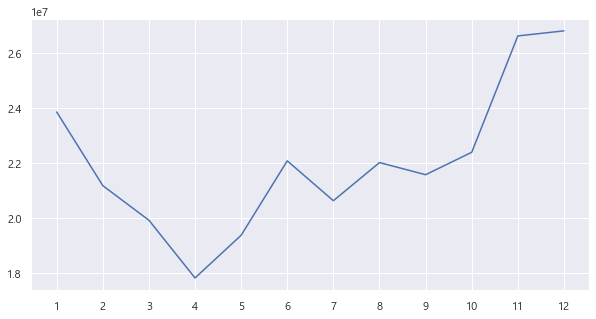

In [17]:
data_monthly_pivot = data.pivot_table(index="time_month", values="salesAMT", aggfunc=[np.mean])
plt.xticks(ticks = range(13), rotation = 0)
plt.plot(data_monthly_pivot)
plt.show()

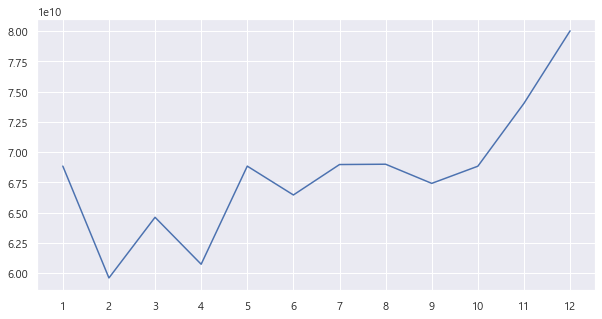

In [18]:
data_monthly_pivot = data.pivot_table(index="time_month", values="salesAMT", aggfunc=np.sum)
plt.xticks(ticks = range(13), rotation = 0)
plt.plot(data_monthly_pivot)
plt.show()

#### 월-제품군 별 총 취급액

In [19]:
data_MonthCate_pivot = data.pivot_table(index=["time_month"],columns="category", values="salesAMT", aggfunc=np.sum)
data_MonthCate_pivot = data_MonthCate_pivot.fillna(0)
data_MonthCate_pivot

category          beauty       bedding       clothes   electronics  \
time_month                                                           
1           3.456610e+09  0.000000e+00  8.508143e+09  7.443582e+09   
2           2.982287e+09  0.000000e+00  6.353548e+09  9.637182e+09   
3           1.935054e+09  0.000000e+00  1.121355e+10  9.185087e+09   
4           2.300892e+09  2.325390e+08  9.552297e+09  1.029206e+10   
5           2.287170e+09  9.268420e+08  1.125595e+10  1.254701e+10   
6           2.262426e+09  2.343745e+09  1.075734e+10  6.147901e+09   
7           3.100676e+09  2.054010e+09  7.997335e+09  7.773842e+09   
8           2.071920e+09  1.385900e+08  7.519910e+09  7.102425e+09   
9           4.824076e+09  1.373200e+08  7.032600e+09  5.534816e+09   
10          5.486537e+09  4.425930e+08  6.520393e+09  5.142377e+09   
11          8.526462e+09  7.161790e+08  8.975461e+09  8.396563e+09   
12          1.008851e+10  0.000000e+00  1.011707e+10  7.923875e+09   

category            food     furniture         goods        health  \
time_month                                                           
1           2.053628e+10  0.000000e+00  1.921087e+09  1.208088e+09   
2           1.201721e+10  2.865252e+09  3.777191e+09  1.136406e+09   
3           7.617622e+09  3.029636e+09  5.304263e+09  1.463361e+09   
4           6.889541e+09  3.149639e+09  3.531384e+09  7.976930e+08   
5           9.772354e+09  2.793887e+09  6.343167e+09  1.106787e+09   
6           9.247418e+09  2.777056e+09  4.185127e+09  2.747047e+09   
7           1.438818e+10  2.411248e+09  6.968579e+09  1.917653e+09   
8           2.101471e+10  2.576131e+09  5.795389e+09  9.936400e+08   
9           1.870237e+10  3.026932e+09  8.716391e+09  1.875243e+09   
10          1.592788e+10  2.947984e+09  6.388970e+09  2.502627e+09   
11          1.487738e+10  1.873053e+09  4.360983e+09  1.864804e+09   
12          1.495129e+10  1.695923e+09  5.002998e+09  2.490471e+09   

category         kitchen   necessaries     underwear  
time_month                                            
1           1.261396e+10  2.561073e+09  1.060010e+10  
2           1.119485e+10  3.123247e+09  6.527907e+09  
3           9.366818e+09  5.324272e+09  1.018290e+10  
4           1.238186e+10  2.575729e+09  9.043216e+09  
5           8.772368e+09  1.936612e+09  1.110494e+10  
6           1.040034e+10  1.681650e+09  1.391574e+10  
7           1.099400e+10  2.279325e+09  9.093623e+09  
8           9.461386e+09  3.919849e+09  8.410758e+09  
9           9.867296e+09  4.164485e+09  3.541833e+09  
10          8.106195e+09  8.714999e+09  6.659845e+09  
11          1.123009e+10  6.482171e+09  6.727834e+09  
12          1.247322e+10  8.883975e+09  6.388235e+09

#### 월-제품군 별 취급액 비율

In [20]:
MonthCate_df = get_ratio_df(data_MonthCate_pivot, data_monthly_pivot)
MonthCate_df.index = MonthCate_df.index+1
MonthCate_df

beauty   bedding   clothes  electronics      food  furniture     goods  \
1   0.050206  0.000000  0.123577     0.108115  0.298280   0.000000  0.027903   
2   0.050026  0.000000  0.106576     0.161657  0.201580   0.048063  0.063360   
3   0.029944  0.000000  0.173524     0.142134  0.117879   0.046882  0.082081   
4   0.037877  0.003828  0.157248     0.169425  0.113414   0.051849  0.058133   
5   0.033221  0.013462  0.163492     0.182245  0.141943   0.040581  0.092134   
6   0.034039  0.035262  0.161848     0.092497  0.139131   0.041782  0.062967   
7   0.044951  0.029778  0.115940     0.112700  0.208589   0.034957  0.101025   
8   0.030026  0.002008  0.108977     0.102927  0.304540   0.037333  0.083985   
9   0.071549  0.002037  0.104305     0.082090  0.277387   0.044894  0.129278   
10  0.079699  0.006429  0.094718     0.074700  0.231374   0.042823  0.092808   
11  0.115174  0.009674  0.121239     0.113420  0.200962   0.025301  0.058908   
12  0.126082  0.000000  0.126439     0.099029  0.186855   0.021195  0.062525   

      health   kitchen  necessaries  underwear  
1   0.017547  0.183212     0.037198   0.153962  
2   0.019062  0.187785     0.052390   0.109501  
3   0.022645  0.144947     0.082390   0.157575  
4   0.013131  0.203827     0.042401   0.148867  
5   0.016076  0.127418     0.028129   0.161299  
6   0.041330  0.156477     0.025301   0.209367  
7   0.027801  0.159383     0.033044   0.131833  
8   0.014400  0.137112     0.056806   0.121887  
9   0.027813  0.146348     0.061766   0.052531  
10  0.036354  0.117753     0.126597   0.096743  
11  0.025190  0.151694     0.087560   0.090879  
12  0.031125  0.155885     0.111028   0.079837

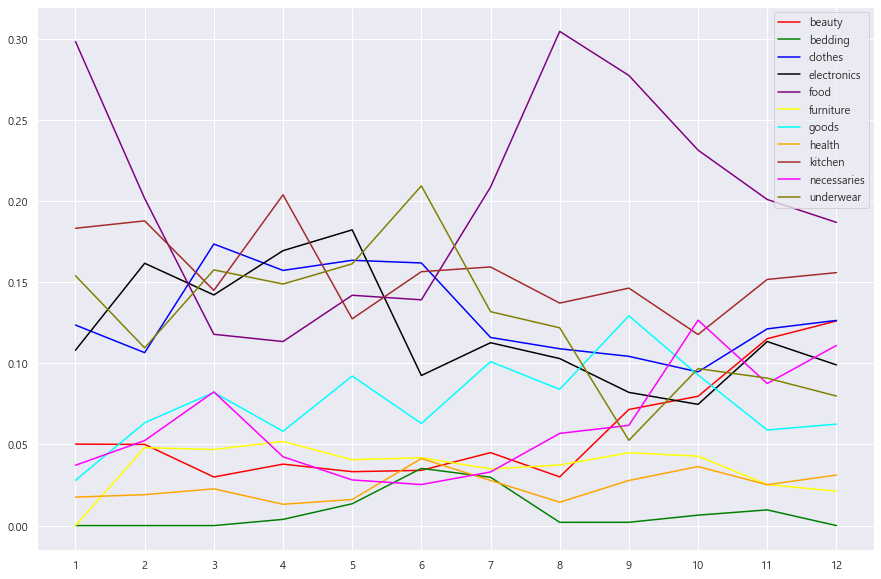

In [21]:
plt.rcParams["figure.figsize"] = (15, 10)
plt.xticks(ticks = range(13), rotation = 0)

plt.plot(MonthCate_df["beauty"], color="red")
plt.plot(MonthCate_df["bedding"], color="green")
plt.plot(MonthCate_df["clothes"], color="blue")
plt.plot(MonthCate_df["electronics"], color="black")
plt.plot(MonthCate_df["food"], color="purple")
plt.plot(MonthCate_df["furniture"], color="yellow")
plt.plot(MonthCate_df["goods"], color="cyan")
plt.plot(MonthCate_df["health"], color="orange")
plt.plot(MonthCate_df["kitchen"], color="brown")
plt.plot(MonthCate_df["necessaries"], color="magenta")
plt.plot(MonthCate_df["underwear"], color="olive")

plt.legend(MonthCate_df.columns, loc="upper right")
plt.show()
plt.rcParams["figure.figsize"] = (10, 5)

#### 분기별 제품군 분석

In [22]:
data_QuaterCate_pivot = data.pivot_table(index=["quater"],columns="category", values="salesAMT", aggfunc=np.sum)
data_QuaterCate_pivot = data_QuaterCate_pivot.fillna(0)
data_QuaterCate_pivot

category        beauty       bedding       clothes   electronics  \
quater                                                             
1.0       8.373951e+09  0.000000e+00  2.607524e+10  2.626585e+10   
2.0       6.850488e+09  3.503126e+09  3.156558e+10  2.898697e+10   
3.0       9.996672e+09  2.329920e+09  2.254984e+10  2.041108e+10   
4.0       2.410151e+10  1.158772e+09  2.561292e+10  2.146282e+10   

category          food     furniture         goods        health  \
quater                                                             
1.0       4.017111e+10  5.894888e+09  1.100254e+10  3.807855e+09   
2.0       2.590931e+10  8.720582e+09  1.405968e+10  4.651527e+09   
3.0       5.410527e+10  8.014311e+09  2.148036e+10  4.786536e+09   
4.0       4.575655e+10  6.516960e+09  1.575295e+10  6.857902e+09   

category       kitchen   necessaries     underwear  
quater                                              
1.0       3.317563e+10  1.100859e+10  2.731091e+10  
2.0       3.155457e+10  6.193991e+09  3.406390e+10  
3.0       3.032268e+10  1.036366e+10  2.104621e+10  
4.0       3.180950e+10  2.408114e+10  1.977591e+10

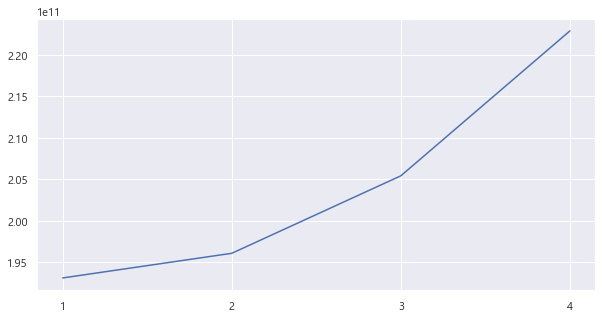

In [23]:
data_quater_pivot = data.pivot_table(index="quater", values="salesAMT", aggfunc=np.sum)
plt.xticks(ticks = range(5), rotation = 0)
plt.plot(data_quater_pivot)
plt.show()

In [24]:
QuaterCate_df = get_ratio_df(data_QuaterCate_pivot, data_quater_pivot)
QuaterCate_df.index = QuaterCate_df.index + 1
QuaterCate_df

beauty   bedding   clothes  electronics      food  furniture     goods  \
1  0.043369  0.000000  0.135044     0.136031  0.208047   0.030530  0.056982   
2  0.034941  0.017868  0.161000     0.147848  0.132150   0.044479  0.071711   
3  0.048668  0.011343  0.109782     0.099369  0.263406   0.039017  0.104575   
4  0.108133  0.005199  0.114914     0.096295  0.205290   0.029239  0.070677   

     health   kitchen  necessaries  underwear  
1  0.019721  0.171817     0.057014   0.141444  
2  0.023725  0.160944     0.031592   0.173742  
3  0.023303  0.147623     0.050454   0.102461  
4  0.030769  0.142716     0.108042   0.088726

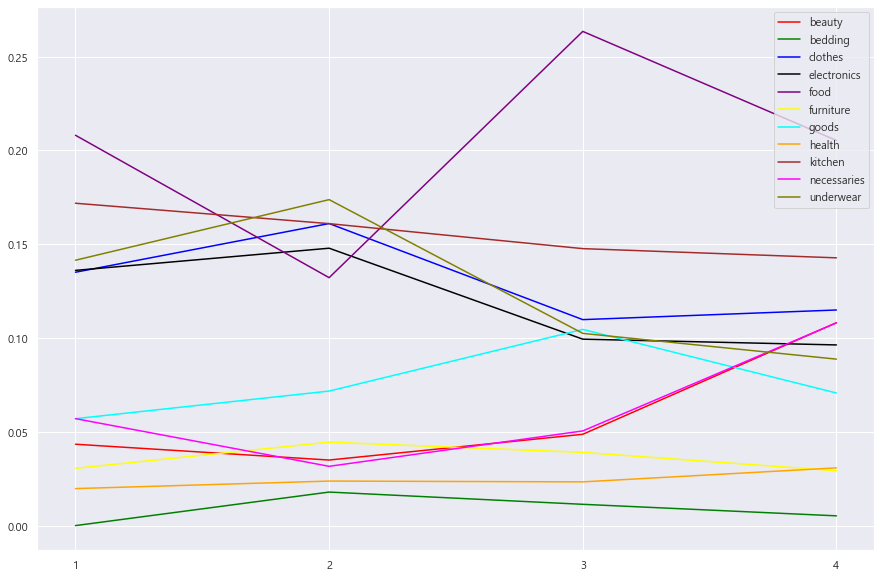

In [25]:
plt.rcParams["figure.figsize"] = (15, 10)
plt.xticks(ticks = range(13), rotation = 0)

plt.plot(QuaterCate_df["beauty"], color="red")
plt.plot(QuaterCate_df["bedding"], color="green")
plt.plot(QuaterCate_df["clothes"], color="blue")
plt.plot(QuaterCate_df["electronics"], color="black")
plt.plot(QuaterCate_df["food"], color="purple")
plt.plot(QuaterCate_df["furniture"], color="yellow")
plt.plot(QuaterCate_df["goods"], color="cyan")
plt.plot(QuaterCate_df["health"], color="orange")
plt.plot(QuaterCate_df["kitchen"], color="brown")
plt.plot(QuaterCate_df["necessaries"], color="magenta")
plt.plot(QuaterCate_df["underwear"], color="olive")

plt.legend(QuaterCate_df.columns, loc="upper right")
plt.show()
plt.rcParams["figure.figsize"] = (10, 5)

#### 제품 가격별 취급액 산포도

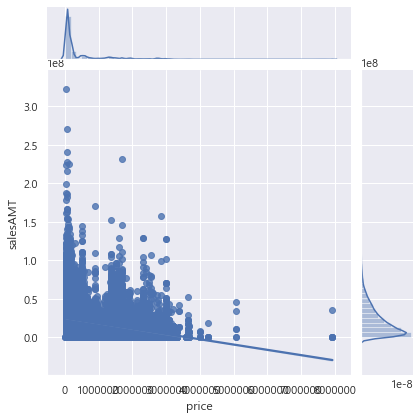

In [26]:
sns.jointplot(data=data, x="price", y="salesAMT", kind = "reg")

#### 일별 분석

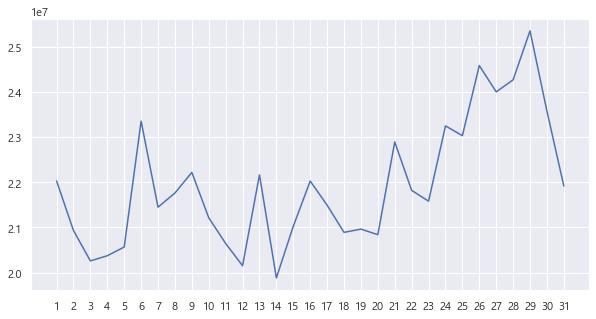

In [27]:
data_dayly_pivot = data.pivot_table(index="time_day", values="salesAMT", aggfunc=np.mean)
plt.xticks(ticks = range(1,32), rotation = 0)
plt.plot(data_dayly_pivot["salesAMT"])
plt.show()

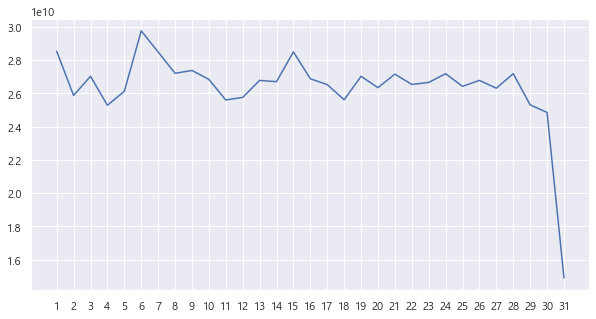

In [28]:
data_dayly_pivot = data.pivot_table(index="time_day", values="salesAMT", aggfunc=np.sum)
plt.xticks(ticks = range(1,32), rotation = 0)
plt.plot(data_dayly_pivot["salesAMT"])
plt.show()

In [29]:
data_DayCate_pivot = data.pivot_table(index=["time_day"],columns="category", values="salesAMT", aggfunc=np.sum)
data_DayCate_pivot = data_DayCate_pivot.fillna(0)
data_DayCate_pivot

category        beauty      bedding       clothes   electronics          food  \
time_day                                                                        
1         1.995438e+09  119836000.0  4.200632e+09  4.229520e+09  4.966373e+09   
2         1.699980e+09  221368000.0  3.293810e+09  2.804742e+09  5.231426e+09   
3         1.625640e+09  442400000.0  2.447748e+09  3.953701e+09  5.556477e+09   
4         2.070494e+09  258071000.0  2.349514e+09  3.263377e+09  5.322248e+09   
5         1.689950e+09  264195000.0  2.884195e+09  3.036587e+09  5.969179e+09   
...                ...          ...           ...           ...           ...   
27        1.466394e+09  293643000.0  3.466815e+09  1.100379e+09  6.942109e+09   
28        1.567847e+09  348209000.0  4.145222e+09  1.050711e+09  6.016339e+09   
29        2.062278e+09  175175000.0  2.725773e+09  2.329063e+09  5.865849e+09   
30        1.599893e+09  328003000.0  2.322360e+09  3.115534e+09  4.684247e+09   
31        5.830330e+08          0.0  1.756816e+09  1.968256e+09  2.915729e+09   

category     furniture         goods       health       kitchen   necessaries  \
time_day                                                                        
1         1.978193e+09  1.528633e+09  371059000.0  3.585631e+09  1.802641e+09   
2         1.229159e+09  1.699659e+09  510629000.0  3.821060e+09  1.558061e+09   
3         4.922260e+08  2.734391e+09  162185000.0  3.638284e+09  2.086535e+09   
4         1.013001e+09  1.395730e+09  528495000.0  4.419773e+09  1.271074e+09   
5         1.414877e+09  1.688830e+09  451906000.0  3.755305e+09  1.555311e+09   
...                ...           ...          ...           ...           ...   
27        2.093590e+08  1.854674e+09  773517000.0  4.926796e+09  1.208716e+09   
28        6.245540e+08  2.256882e+09  737679000.0  5.159137e+09  1.667723e+09   
29        5.818030e+08  1.991872e+09  786834000.0  3.670007e+09  1.632698e+09   
30        8.405050e+08  1.476875e+09  329206000.0  4.263822e+09  1.907703e+09   
31        9.872310e+08  1.306070e+09  520393000.0  2.156374e+09  1.363101e+09   

category     underwear  
time_day                
1         3.750180e+09  
2         3.802459e+09  
3         3.885445e+09  
4         3.391095e+09  
5         3.408503e+09  
...                ...  
27        4.065994e+09  
28        3.608749e+09  
29        3.484039e+09  
30        3.983442e+09  
31        1.345765e+09  

[31 rows x 11 columns]

In [30]:
DayCate_df = get_ratio_df(data_DayCate_pivot, data_dayly_pivot)
DayCate_df.index = DayCate_df.index + 1
DayCate_df

beauty   bedding   clothes  electronics      food  furniture     goods  \
1   0.069946  0.004201  0.147245     0.148258  0.174087   0.069342  0.053583   
2   0.065706  0.008556  0.127310     0.108407  0.202201   0.047509  0.065694   
3   0.060153  0.016370  0.090573     0.146298  0.205605   0.018214  0.101180   
4   0.081893  0.010207  0.092929     0.129075  0.210508   0.040067  0.055205   
5   0.064702  0.010115  0.110426     0.116260  0.228539   0.054171  0.064659   
..       ...       ...       ...          ...       ...        ...       ...   
27  0.055739  0.011162  0.131776     0.041826  0.263874   0.007958  0.070497   
28  0.057677  0.012810  0.152493     0.038653  0.221327   0.022976  0.083025   
29  0.081496  0.006922  0.107715     0.092038  0.231802   0.022991  0.078713   
30  0.064378  0.013198  0.093449     0.125366  0.188489   0.033821  0.059428   
31  0.039122  0.000000  0.117885     0.132073  0.195650   0.066245  0.087639   

      health   kitchen  necessaries  underwear  
1   0.013007  0.125688     0.063188   0.131455  
2   0.019736  0.147689     0.060221   0.146970  
3   0.006001  0.134626     0.077207   0.143772  
4   0.020903  0.174813     0.050274   0.134126  
5   0.017302  0.143778     0.059547   0.130500  
..       ...       ...          ...        ...  
27  0.029402  0.187271     0.045944   0.154551  
28  0.027137  0.189792     0.061352   0.132757  
29  0.031094  0.145029     0.064520   0.137680  
30  0.013247  0.171571     0.076764   0.160289  
31  0.034919  0.144696     0.091466   0.090303  

[31 rows x 11 columns]

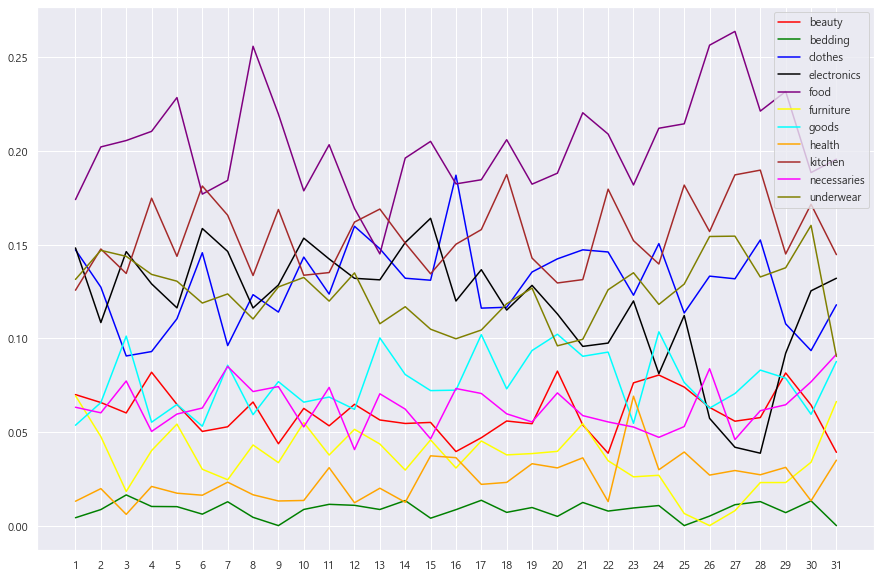

In [31]:
plt.rcParams["figure.figsize"] = (15, 10)
plt.xticks(ticks = range(1,32), rotation = 0)

plt.plot(DayCate_df["beauty"], color="red")
plt.plot(DayCate_df["bedding"], color="green")
plt.plot(DayCate_df["clothes"], color="blue")
plt.plot(DayCate_df["electronics"], color="black")
plt.plot(DayCate_df["food"], color="purple")
plt.plot(DayCate_df["furniture"], color="yellow")
plt.plot(DayCate_df["goods"], color="cyan")
plt.plot(DayCate_df["health"], color="orange")
plt.plot(DayCate_df["kitchen"], color="brown")
plt.plot(DayCate_df["necessaries"], color="magenta")
plt.plot(DayCate_df["underwear"], color="olive")

plt.legend(DayCate_df.columns, loc="upper right")
plt.show()
plt.rcParams["figure.figsize"] = (10, 5)

#### 요일별 분석

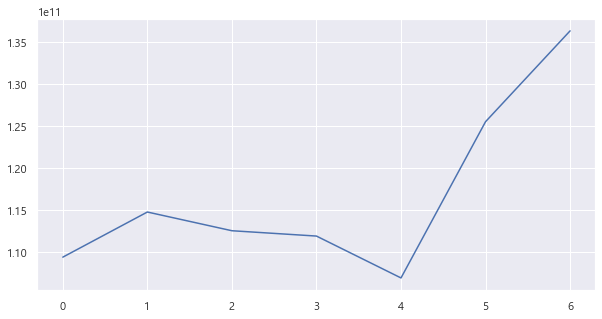

In [32]:
# 요일별 총 취급액
data_DOW_pivot = data.pivot_table(index="day_of_the_week", values="salesAMT", aggfunc=np.sum)
plt.xticks(ticks = range(7), rotation = 0)
plt.plot(data_DOW_pivot["salesAMT"])
plt.show()

In [33]:
data_DOWCate_pivot = data.pivot_table(index=["day_of_the_week"],columns="category", values="salesAMT", aggfunc=np.sum)
data_DOWCate_pivot = data_DOWCate_pivot.fillna(0)
data_DOWCate_pivot

category               beauty       bedding       clothes   electronics  \
day_of_the_week                                                           
0                6.632876e+09  1.207865e+09  1.208269e+10  1.121580e+10   
1                6.542250e+09  1.111133e+09  1.347375e+10  1.119150e+10   
2                7.010408e+09  1.265803e+09  1.186034e+10  1.337186e+10   
3                5.297046e+09  1.025711e+09  1.178658e+10  1.330504e+10   
4                5.321520e+09  8.337000e+08  1.265779e+10  1.290696e+10   
5                7.905968e+09  3.458310e+08  2.154831e+10  1.601187e+10   
6                1.061255e+10  1.201775e+09  2.239413e+10  1.912370e+10   

category                 food     furniture         goods        health  \
day_of_the_week                                                           
0                2.472435e+10  4.288623e+09  7.102266e+09  2.203759e+09   
1                2.543856e+10  4.152825e+09  9.150200e+09  2.879218e+09   
2                2.332168e+10  4.430722e+09  8.011716e+09  2.824034e+09   
3                2.467150e+10  3.773124e+09  8.410938e+09  4.437303e+09   
4                2.248028e+10  4.568805e+09  9.574636e+09  3.331756e+09   
5                2.425589e+10  3.014505e+09  1.092730e+10  2.205522e+09   
6                2.104998e+10  4.918137e+09  9.118470e+09  2.222228e+09   

category              kitchen   necessaries     underwear  
day_of_the_week                                            
0                1.820053e+10  7.454149e+09  1.429248e+10  
1                1.845282e+10  6.575825e+09  1.580821e+10  
2                2.033965e+10  6.663256e+09  1.344980e+10  
3                1.611882e+10  9.245880e+09  1.384263e+10  
4                1.609905e+10  6.838654e+09  1.231723e+10  
5                1.730334e+10  6.833241e+09  1.517432e+10  
6                2.034817e+10  8.036382e+09  1.731226e+10

In [34]:
DOWCate_df = get_ratio_df(data_DOWCate_pivot, data_DOW_pivot)
DOWCate_df

beauty   bedding   clothes  electronics      food  furniture     goods  \
0  0.060627  0.011040  0.110440     0.102516  0.225988   0.039199  0.064917   
1  0.057000  0.009681  0.117391     0.097507  0.221636   0.036182  0.079722   
2  0.062287  0.011247  0.105379     0.118809  0.207213   0.039367  0.071184   
3  0.047331  0.009165  0.105318     0.118886  0.220449   0.033714  0.075155   
4  0.049766  0.007797  0.118374     0.120704  0.210233   0.042727  0.089541   
5  0.062983  0.002755  0.171664     0.127558  0.193234   0.024015  0.087052   
6  0.077840  0.008815  0.164255     0.140267  0.154396   0.036073  0.066881   

     health   kitchen  necessaries  underwear  
0  0.020143  0.166359     0.068133   0.130638  
1  0.025085  0.160772     0.057293   0.137731  
2  0.025092  0.180718     0.059203   0.119501  
3  0.039649  0.144028     0.082616   0.123689  
4  0.031158  0.150556     0.063954   0.115189  
5  0.017570  0.137847     0.054437   0.120886  
6  0.016299  0.149248     0.058945   0.126981

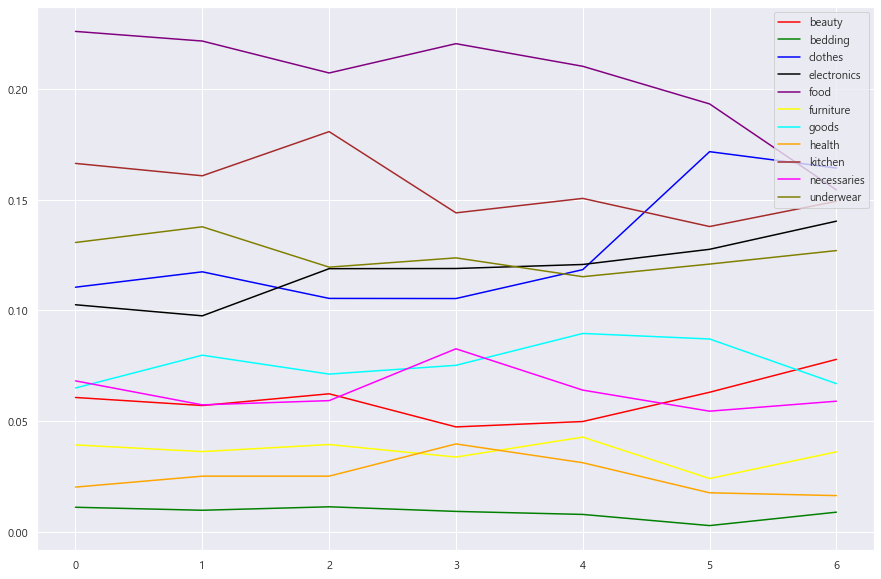

In [35]:
plt.rcParams["figure.figsize"] = (15, 10)
plt.xticks(ticks = range(13), rotation = 0)

plt.plot(DOWCate_df["beauty"], color="red")
plt.plot(DOWCate_df["bedding"], color="green")
plt.plot(DOWCate_df["clothes"], color="blue")
plt.plot(DOWCate_df["electronics"], color="black")
plt.plot(DOWCate_df["food"], color="purple")
plt.plot(DOWCate_df["furniture"], color="yellow")
plt.plot(DOWCate_df["goods"], color="cyan")
plt.plot(DOWCate_df["health"], color="orange")
plt.plot(DOWCate_df["kitchen"], color="brown")
plt.plot(DOWCate_df["necessaries"], color="magenta")
plt.plot(DOWCate_df["underwear"], color="olive")

plt.legend(DOWCate_df.columns, loc="upper right")
plt.show()
plt.rcParams["figure.figsize"] = (10, 5)

### 시간별 분석

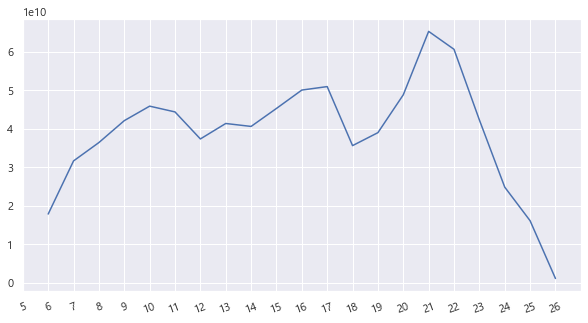

In [36]:
data_grouped_by_broadcast_date_hour = data.pivot_table(index='time_hour', values='salesAMT', aggfunc=np.sum)
plt.xticks(range(0,27), rotation=20)
plt.plot(data_grouped_by_broadcast_date_hour["salesAMT"])
plt.show()

In [37]:
data_HourCate_pivot = data.pivot_table(index=["time_hour"],columns="category", values="salesAMT", aggfunc=np.sum)
data_HourCate_pivot = data_HourCate_pivot.fillna(0)
data_HourCate_pivot

category         beauty      bedding       clothes   electronics  \
time_hour                                                          
6          1.305497e+09   83903000.0  5.341795e+09  0.000000e+00   
7          2.276557e+09          0.0  8.754229e+09  1.982600e+08   
8          2.902313e+09   46143000.0  1.058037e+10  2.438790e+08   
9          3.645472e+09          0.0  1.220332e+10  7.497490e+08   
10         2.023499e+09  130435000.0  8.762969e+09  2.772517e+09   
...                 ...          ...           ...           ...   
22         1.436961e+09  177594000.0  2.665557e+09  2.921343e+10   
23         2.103373e+09  257865000.0  5.220155e+09  1.104218e+10   
24         1.951038e+09   22273000.0  6.005822e+09  9.048300e+08   
25         1.788060e+09  201105000.0  3.125161e+09  9.672900e+07   
26         2.316430e+08   21493000.0  1.767870e+08  0.000000e+00   

category           food     furniture         goods        health  \
time_hour                                                           
6          2.780970e+08  1.613780e+08  1.350567e+09  1.568108e+09   
7          4.603710e+08  9.112100e+07  4.226417e+09  4.690477e+09   
8          1.408970e+08  1.668360e+08  5.838278e+09  1.443522e+09   
9          5.000490e+08  0.000000e+00  6.980311e+09  1.376154e+09   
10         7.548287e+09  1.119910e+08  7.190507e+09  8.250400e+08   
...                 ...           ...           ...           ...   
22         3.199077e+09  7.513378e+09  3.773110e+08  4.507700e+07   
23         9.298770e+08  5.883072e+09  1.627875e+09  6.008390e+08   
24         4.851740e+08  1.082995e+09  3.381993e+09  4.545280e+08   
25         1.484938e+09  1.489530e+08  2.469104e+09  4.951630e+08   
26         9.741200e+07  1.082500e+07  7.735300e+07  6.485700e+07   

category        kitchen   necessaries     underwear  
time_hour                                            
6          2.203386e+09  2.435215e+09  3.090165e+09  
7          3.768648e+09  2.223372e+09  4.946103e+09  
8          6.011654e+09  3.305786e+09  5.731367e+09  
9          8.455213e+09  2.994438e+09  5.197846e+09  
10         9.683774e+09  1.703778e+09  5.120111e+09  
...                 ...           ...           ...  
22         6.103610e+09  3.580420e+09  6.340749e+09  
23         2.009354e+09  4.804325e+09  7.811752e+09  
24         8.277310e+08  2.833262e+09  6.864757e+09  
25         2.714100e+08  1.794937e+09  4.202442e+09  
26         4.548600e+07  1.534240e+08  1.850420e+08  

[21 rows x 11 columns]

In [38]:
HourCate_df = get_ratio_df(data_HourCate_pivot, data_grouped_by_broadcast_date_hour)
HourCate_df.index = HourCate_df.index + 6
HourCate_df

beauty   bedding   clothes  electronics      food  furniture     goods  \
6   0.073268  0.004709  0.299796     0.000000  0.015608   0.009057  0.075797   
7   0.071962  0.000000  0.276721     0.006267  0.014552   0.002880  0.133597   
8   0.079710  0.001267  0.290581     0.006698  0.003870   0.004582  0.160344   
9   0.086586  0.000000  0.289847     0.017808  0.011877   0.000000  0.165793   
10  0.044111  0.002843  0.191027     0.060439  0.164548   0.002441  0.156748   
..       ...       ...       ...          ...       ...        ...       ...   
22  0.023691  0.002928  0.043948     0.481647  0.052744   0.123874  0.006221   
23  0.049736  0.006097  0.123435     0.261102  0.021988   0.139110  0.038493   
24  0.078625  0.000898  0.242030     0.036464  0.019552   0.043644  0.136292   
25  0.111212  0.012508  0.194375     0.006016  0.092358   0.009264  0.153570   
26  0.217644  0.020194  0.166103     0.000000  0.091525   0.010171  0.072678   

      health   kitchen  necessaries  underwear  
6   0.088006  0.123660     0.136671   0.173428  
7   0.148266  0.119127     0.070281   0.156346  
8   0.039645  0.165105     0.090791   0.157407  
9   0.032686  0.200824     0.071122   0.123457  
10  0.017985  0.211100     0.037141   0.111615  
..       ...       ...          ...        ...  
22  0.000743  0.100631     0.059031   0.104541  
23  0.014207  0.047513     0.113602   0.184716  
24  0.018317  0.033357     0.114178   0.276644  
25  0.030798  0.016881     0.111639   0.261378  
26  0.060937  0.042737     0.144152   0.173859  

[21 rows x 11 columns]

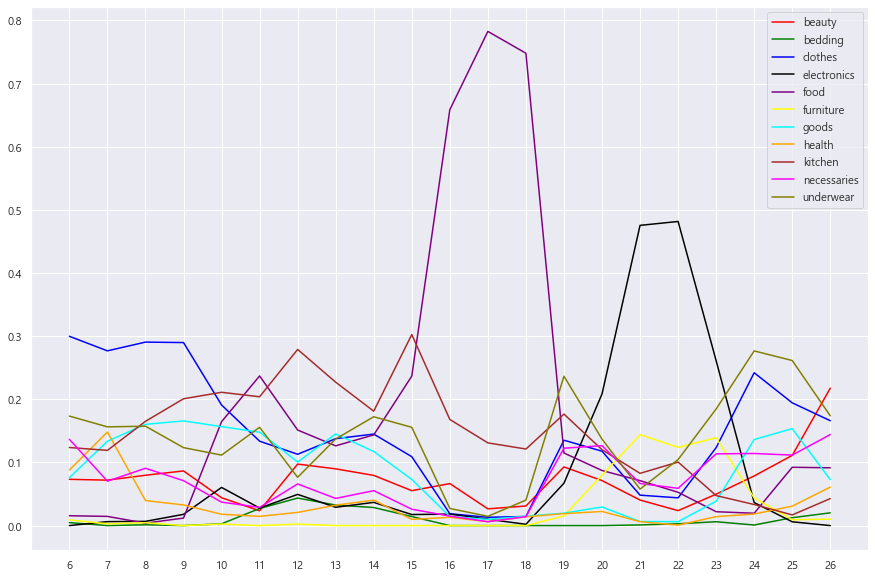

In [39]:
plt.rcParams["figure.figsize"] = (15, 10)
plt.xticks(ticks = range(6,27), rotation = 0)

plt.plot(HourCate_df["beauty"], color="red")
plt.plot(HourCate_df["bedding"], color="green")
plt.plot(HourCate_df["clothes"], color="blue")
plt.plot(HourCate_df["electronics"], color="black")
plt.plot(HourCate_df["food"], color="purple")
plt.plot(HourCate_df["furniture"], color="yellow")
plt.plot(HourCate_df["goods"], color="cyan")
plt.plot(HourCate_df["health"], color="orange")
plt.plot(HourCate_df["kitchen"], color="brown")
plt.plot(HourCate_df["necessaries"], color="magenta")
plt.plot(HourCate_df["underwear"], color="olive")

plt.legend(HourCate_df.columns, loc="upper right")
plt.show()
plt.rcParams["figure.figsize"] = (10, 5)

## 가중치(비율) feature화

#### 월-상품군 취급액 비율 가중치

In [40]:
for i in range(12):
    for cate in data["category"].unique():
        data.loc[(data["category"] == cate) & (data["time_month"] == i+1), "monthCate_weight"] = MonthCate_df.iloc[i][cate]

#### 분기-상품군 취급액 비율 가중치

In [41]:
for i in range(4):
    for cate in data["category"].unique():
        data.loc[(data["category"] == cate) & (data["quater"] == i+1), "quaterCate_weight"] = QuaterCate_df.iloc[i][cate]

#### 일-상품군 취급액 비율 가중치

In [42]:
for i in range(31):
    for cate in data["category"].unique():
        data.loc[(data["category"] == cate) & (data["time_day"] == i+1), "dayCate_weight"] = DayCate_df.iloc[i][cate]

#### 요일-상품군 취급액 비율 가중치

In [43]:
for i in range(7):
    for cate in data["category"].unique():
        data.loc[(data["category"] == cate) & (data["day_of_the_week"] == i), "DOWCate_weight"] = DOWCate_df.iloc[i][cate]

#### 시(hour)-상품군 취급액 비율 가중치

In [44]:
for i in range(6,27):
    for cate in data["category"].unique():
        data.loc[(data["category"] == cate) & (data["time_hour"] == i), "hourCateAmount_weight"] = HourCate_df.iloc[i-6][cate]

## MAPE

In [45]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true))) * 100

## Training

In [46]:
feature_list = ['exposure_time', 'mcode', 'product_code', 'price', 'time_month', 'time_day',
       'time_hour', 'time_min', 'day_of_the_week',
       'monthCate_weight',
       'DOWCate_weight', 'hourCateAmount_weight',
       'category_bedding', 'category_clothes',
       'category_electronics', 'category_food',
       'category_furniture', 'category_goods',
       'category_health', 'category_kitchen',
       'category_necessaries', 'category_underwear']
label = 'salesAMT'

In [310]:
# 상품군 one-hot encoding
data_dummy = pd.get_dummies(data, columns=['category'], prefix='category', drop_first=True)

In [311]:
train_X = data_dummy[feature_list]
train_y = data_dummy[label]

In [312]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import make_scorer

# kfold = KFold(n_splits=5, random_state=47, shuffle=True)
# my_scorer = make_scorer(mape, greater_is_better=False)

In [313]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.25, random_state=147, shuffle=True)

In [314]:
rf_model = RandomForestRegressor(n_jobs=-1)
# score = cross_val_score(rf_model, train_X, train_y, scoring=my_scorer, cv=kfold)
# print("교차 검증 점수:\n{}".format(score))

In [315]:
param_dist = {
    "max_depth": [7, 11, 15, 18, 21],
    "max_features": sp_randint(1, len(feature_list)+1),
    "min_samples_split": sp_randint(2, 21),
    "min_samples_leaf": sp_randint(1, 21),
    "bootstrap": [True, False],
    "random_state": [147]
}

n_iter_search = 20
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=n_iter_search)

In [316]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=-1, oob_score=False,
                                                   random_...


In [317]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.653 (std: 0.012)
Parameters: {'bootstrap': False, 'max_depth': 18, 'max_features': 17, 'min_samples_leaf': 5, 'min_samples_split': 19, 'random_state': 147}

Model with rank: 2
Mean validation score: 0.638 (std: 0.011)
Parameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 11, 'min_samples_leaf': 9, 'min_samples_split': 15, 'random_state': 147}

Model with rank: 3
Mean validation score: 0.613 (std: 0.013)
Parameters: {'bootstrap': False, 'max_depth': 21, 'max_features': 16, 'min_samples_leaf': 19, 'min_samples_split': 5, 'random_state': 147}



In [318]:
rf_model2 = RandomForestRegressor(
    n_estimators=300,
    n_jobs=-1,
    bootstrap = False,
    max_depth = 21,
    max_features = 13,
    min_samples_leaf = 4,
    min_samples_split = 4,
    random_state = 147
)

## Use Random Forest model

In [319]:
rf_model2.fit(X_train, y_train)
pred = rf_model2.predict(X_test)

In [320]:
mape(y_test, pred)

563.6379060598463

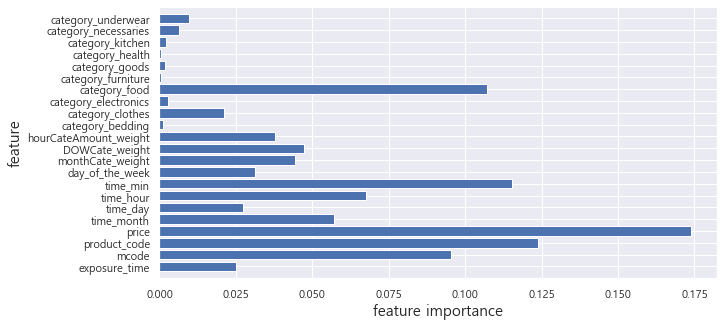

In [321]:
n_feature = X_train.shape[1]
index = np.arange(n_feature)

plt.barh(index, rf_model2.feature_importances_, align='center')
plt.yticks(index, X_train.columns)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)

plt.show()

## Use LGBM

In [325]:
import lightgbm as lgb
model = lgb.LGBMRegressor(
    random_state = 147,
    n_estimators = 3000
    )
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [326]:
model_score = mape(y_test, predicted)
model_score

504.0549583031828

In [ ]:
n_feature = X_train.shape[1]
index = np.arange(n_feature)

plt.barh(index, model.feature_importances_, align='center')
plt.yticks(index, X_train.columns)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)

plt.show()

In [371]:
import random

iter_num = 100
total_importance = [0] * len(X_train.columns)
total_model_score = 0

for i in range(iter_num):
    random_value = random.randint(1, 10000)
    X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.25, random_state=random_value, shuffle=True)
    model = lgb.LGBMRegressor(
        random_state = random_value,
        n_estimators = 3000
    )
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    model_score = mape(y_test, predicted)
    print(i, model_score)
    total_model_score = total_model_score + model_score
    total_importance = total_importance + model.feature_importances_

0 562.9656968093442
1 546.0497923223011
2 533.7742712135531
3 503.38497126204834
4 531.4888206244261
5 510.85323867586584
6 545.7900628817198
7 539.3036226554983
8 501.2510942381998
9 516.8670964308548
10 540.4675571794625
11 491.1993915843193
12 561.131335929242
13 490.5861522792992
14 524.8580716863253
15 541.4101719130184
16 467.4764001091636
17 567.3248487517211
18 577.7387845484451
19 549.7211488872249
20 482.40970870755115
21 527.9228792742521
22 517.6804137904265
23 496.95559156824345
24 507.8630049719333
25 559.1486104934877
26 497.7748336541974
27 511.15452226202126
28 537.2621499772299
29 499.93661229673154
30 526.18458447042
31 547.9907415131522
32 469.06843668800377
33 495.5480287911677
34 524.5073232803887
35 523.7659220381944
36 491.8176721662884
37 494.4168379778839
38 550.3471331777292
39 556.6482558020385
40 544.3720158756113
41 520.67356031845
42 526.6072621754702
43 582.7169925325891
44 516.3779753054397
45 494.91186644600884
46 512.9566580857222
47 523.0142731080351

In [374]:
total_model_score = total_model_score/iter_num
total_model_score

5.220699048452299

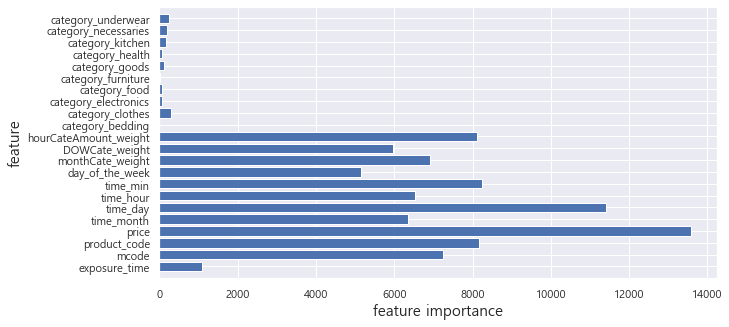

In [375]:
mean_importance = total_importance/iter_num

n_feature = X_train.shape[1]
index = np.arange(n_feature)

plt.barh(index, mean_importance, align='center')
plt.yticks(index, X_train.columns)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)

plt.show()